# Decoding the relationships between genes

## Getting Longest Common Subsequences (LCSs)

### Step-by-step explanation
The LCS algorithm is used to find the longest subsequence that is common to two sequences or strings.

1. The algorithm creates a table (matrix) to store the lengths of the longest common subsequences of substrings. The table is initialized with zeros.

2. Moving through the two input sequences, the algorithm compares characters at each position. If the characters match, it increments the value in the table at the corresponding position by one plus the value in the table diagonally before that position. If they don't match, it takes the maximum of the values above and to the left of the current position and places it in the current position of the table.

3. Once the table is filled, the algorithm backtracks through it to reconstruct the LCSs. Starting from the bottom-right corner of the table, it follows the path of maximum values towards the top-left corner. If it encounters a match (i.e., when the characters from both sequences are the same), it includes that character in the LCS and moves diagonally up and to the left in the table. If there is no match, it moves either upward or leftward, depending on which adjacent cell has the higher value.

4. Upon completing the backtracking process, the algorithm has constructed the LCSs. It returns this result along with its length (the value of bottom-right corner).


### Dynamic programming in LCS calculation
I used dynamic programming (DP) for LCS calculation, since it satisfies both condition for DP. DP guarantees finding the optimal solution to the LCS problem. By systematically evaluating and storing solutions to subproblems, DP ensures that the final solution is globally optimal.

#### Optimal Substructure
The length of the longest common subsequence between any two substrings of x and y can be derived from the lengths of the longest common subsequences of their respective substrings. This aligns with the conditino of optimal substructure, where the solution to the overall problem can be constructed from the solutions to its subproblems.

#### Overlapping Subproblems
In the LCS problem, subproblems arise when considering substrings of the input strings x and y. For each pair of indices (i, j) representing positions in the strings, the algorithm needs to determine the length of the longest common subsequence for the substrings x[0:i] and y[0:j]. These subproblems overlap because they share common substrings. I addresses overlapping subproblems by using memoization. The memo dictionary stores the solutions to subproblems (the set of LCSs for a given pair of indices (i, j)) to avoid recalculating them. If a subproblem has already been solved, the function retrieves its solution from the memo dictionary instead of recomputing it.

In [218]:
def longest_common_subsequences(x, y):
    """
    Gives the length of the longest common substring between strings x and y
    Inputs
    ----------
    x, y: strings
        Strings to compute the LCS
    
    Returns
    ----------
    all_lcs: tuple ([LCS1, LCS2, ...], len(LCS1))
        Tuple of a list of all the possible LCS and the corresponding length (size)
    """
    # Create a matrix to store lengths of longest common subsequence
    m = len(x)
    n = len(y)
    lcs_table = [[0] * (n + 1) for i in range(m + 1)]
    
    # Build the LCS table: increment diagonally if characters match, otherwise take the max from left or above
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if x[i - 1] == y[j - 1]:
                lcs_table[i][j] = lcs_table[i - 1][j - 1] + 1
            else:
                lcs_table[i][j] = max(lcs_table[i - 1][j], lcs_table[i][j - 1])
    lcs_length = lcs_table[m][n]
    
    # Check whether max LCS length is 0
    if lcs_length == 0:
        return (None, 0)
    
    memo = {}
    def find_LCS(i, j):
        if (i, j) in memo:
            return memo[(i, j)]
        if i == 0 or j == 0:
            return set([""])
        elif x[i - 1] == y[j - 1]:
            lcs = {s + x[i - 1] for s in find_LCS(i - 1, j - 1)}
        else:
            lcs = set()
            if lcs_table[i - 1][j] == lcs_table[i][j]:
                lcs.update(find_LCS(i - 1, j))
            if lcs_table[i][j - 1] == lcs_table[i][j]:
                lcs.update(find_LCS(i, j - 1))
        memo[(i, j)] = lcs
        return lcs
    all_lcs = list(find_LCS(m, n))
    return (all_lcs, lcs_length)

### Test Cases (provided in the assignment)

In [237]:
x1, y1 = 'ABCBDAB', 'BDCABA'
x2, y2 = 'abc', ''
x3, y3 = 'abc', 'a'
x4, y4 = 'abc', 'ac'
print(longest_common_subsequences(x1, y1))
assert longest_common_subsequences(x1, y1) == (['BCAB', 'BCBA', 'BDAB'], 4)
assert longest_common_subsequences(x2, y2) == (None, 0)
assert longest_common_subsequences(x3, y3) == (['a'], 1)
assert longest_common_subsequences(x4, y4) == (['ac'], 2)

(['BCAB', 'BCBA', 'BDAB'], 4)


### Extra test cases

#### Normal cases
1. "ABCBDAB", "BDCABA"

Tests the strings with multiple overlapping common subsequences. It ensures that the function can handle and return multiple LCS that have the same length but differ in composition.

2. "XMJYAUZ", "MZJAWXU"

Tests the strings when they are unique but the characters are spread across the strings in a non-contiguous manner

#### Edge cases

1. "", "" and similar cases with one string empty

Tests how the function handles cases where one or both strings are empty. Ideally, no LCS can exist in such scenarios.

2. "abc", "def"

Tests the strings that have no characters in common.

3. "aaa", "aaa" and "abc", "abc":

Tests the function when the strings are identical, which should result in the LCS being the string itself.

4. "aaaaa", "aaa":

Tests the function when one string is a repeated character subset of the other.

5. "AAABBB", "ABABAB":

Tests a more complex scenario with repetitions and interleaved common subsequences.

In [226]:
def test_longest_common_subsequences():
    """
    Test the longest_common_subsequences function by running a set of predefined normal and edge cases.
    """
    cases = [
        ("ABCBDAB", "BDCABA", (['BCAB', 'BCBA', 'BDAB'], 4)),
        ("XMJYAUZ", "MZJAWXU", (['MJAU'], 4)),
        ("", "", (None, 0)),
        ("abc", "", (None, 0)),
        ("", "abc", (None, 0)),
        ("abc", "def", (None, 0)),
        ("aaa", "aaa", (['aaa'], 3)),
        ("abc", "abc", (['abc'], 3)),
        ("aaaaa", "aaa", (['aaa'], 3)),
        ("AAABBB", "ABABAB", (['ABBB', 'AABB', 'AAAB'], 4))
    ]

    for x, y, expected in cases:
        result = longest_common_subsequences(x, y)
        assert result == expected, f"Failed normal case for input: {x}, {y}. Expected {expected}, got {result}"

    print("All tests passed!")

test_longest_common_subsequences()

All tests passed!


## set_strings LCS matrix

I modified _longest_common_subsequences_ function to only return the max LCS length (_lcs_length_). Applying this function to set_strings, I got the LCSs lengths for every pair of strings in set_strings
(See Appendix 1 for the code)

**Table 1: Longest Common Subsequence (LCS) Lengths Matrix**

|     |   a |   b |   c |   d |   e |   f |   g |
|-----|-----|-----|-----|-----|-----|-----|-----|
| **a** | 151 |  94 | 100 |  96 |  95 | 113 | 122 |
| **b** |  94 | 145 |  91 | 111 | 117 |  99 |  89 |
| **c** | 100 |  91 | 120 |  93 |  98 | 101 | 107 |
| **d** |  96 | 111 |  93 | 146 | 115 | 105 |  96 |
| **e** |  95 | 117 |  98 | 115 | 135 | 102 |  95 |
| **f** | 113 |  99 | 101 | 105 | 102 | 160 | 121 |
| **g** | 122 |  89 | 107 |  96 |  95 | 121 | 140 |

_Note: This table represents the LCS lengths between pairs of gene sequences labeled from 'a' to 'g'. Each cell (i, j) shows the LCS length between the sequence labeled by row 'i' and the sequence labeled by column 'j'_

Here, the matrix is symmetrical because the LCS between two strings is not affected by their order. This means we only need to compute and store the upper triangular portion of the matrix, including the diagonal, to avoid redundancy.

However, for easier manual examination and verification, I have retained the full matrix in this instance. This allows me to cross-reference LCS lengths more straightforwardly by reviewing either rows or columns directly.

#### Manual Examination
Although the data here is limited to displaying only the maximum LCS length between each pair of strings, it allows us to infer that a higher LCS length may indicate a stronger relationship between the pairs. This is because the LCS length reflects the extent of the longest sequence of characters that appear in the same order within both strings. A longer common subsequence suggests greater similarity or a higher degree of commonality, which could be interpreted as a stronger relationship.

To identify strongly related pairs, a threshold based on statistical measures of the LCS lengths can be used effectively. I defined a 'strong relationship' as any pair whose LCS length is significantly above the average for the dataset. Specifically, a threshold set at the average LCS length plus one standard deviation will differentiate those pairs that are more strongly related compared to others, theoretically including approximately the top 16% of the values. Diagonal values have been excluded from these calculations because they represent the LCS of strings with themselves (equal to their own lengths) and do not accurately reflect the relationships between different strings. This method ensures that the threshold is based on the actual distribution of LCS lengths among distinct pairs, highlighting pairs whose similarity is not only apparent but also statistically significant.

I calculated the average, standard deviation, and threshold (See Appendix 2 for code)
- Average: 102.85
- Std Dev: 9.78
- **Threshold: 112.63**

The "strongly related pairs" with a max LCS legnth higher than the threshold is:
- Pair (a, f) with an LCS length of 113
- Pair (a, g) with an LCS length of 122
- Pair (b, e) with an LCS length of 117
- Pair (d, e) with an LCS length of 115
- Pair (f, g) with an LCS length of 121

## Finding Out the Relationship Between Strings

In order to examine the precise relationship between strings, I took two approaches: local and global. While the local approach focuses on comparing each gene sequence (node) with its immediate potential relatives, the global approach focuses on evaluating the entire set of sequences at once.

## Local Strategy

For the local strategy, I used two different metrices to identify the root node and the children node of the genealogy tree.

### Metric for identifying the root
I chose to use the normalized sum of the LCS scores as the metric for identifying the root of the genealogy tree. Specifically, for each sequence, I divide the sum of all its LCS scores with other sequences by the LCS score of the sequence with itself (which represents its length). This metric essentially measures the average similarity of a sequence to all other sequences relative to its size.  Thus, the sequence with the highest score in this metric becomes the root because it shows the highest average similarity or connection to all other sequences, suggesting it is the most central.


#### Advantages
- The root sequence, having the highest average similarity, likely captures the common features or elements shared across the set, which is useful in genealogy where the root often represents ancestral or foundational characteristics.
-  By dividing by the sequence’s own LCS (its length), the metric normalizes for sequence length, preventing longer sequences from being preferentially chosen simply due to their length. This ensures that the root is chosen based on its content and relationships, not just its size.

#### Limitations
- If a sequence is unusually similar to many others (perhaps due to repetitive elements that might not be significant), it could skew the results, making this sequence seem more central than it truly is.
- The metric assumes that high average similarity is an indicator of centrality, which might not always hold.

####  Justification for using this metric in this specific context
Despite these limitations, in genealogy, the root often symbolizes an ancestral position, which ideally should have some degree of connection or similarity to all descendants, which is also addressed in the assignment instruction. This metric effectively captures this aspect by emphasizing sequences that share the most in common with the rest of the data, suggesting a potential ancestral role.


### Metric for identifying the children
I chose to approach finding child nodes by adopting a local strategy within the algorithm. It focuses on direct, immediate comparisons rather than considering the global dataset context. After identifying a parent node, the algorithm evaluates potential children by comparing their LCS scores specifically with the parent. The highest scores indicate the strongest direct similarity, suggesting that these sequences are the most closely related and therefore suitable as children.

The method is greedy: it selects the best candidates for children based only on current available data (LCS scores with the parent). In other words, the algorithm selects the children for any given node based on the highest LCS scores without considering how these choices might affect the overall structure of the tree or future choices.

#### Advantage / Justification for using this metric in this specific context
- Only the LCS scores between the parent and potential children are considered, not the relationships these children might have with other nodes or the overall structure of the tree. This simplifies the calculation and focuses on the most immediate and significant relationships.
- By selecting children based on the highest LCS scores with a parent node, the algorithm ensures that the most closely related sequences are grouped together. In genealogy, this is analogous to identifying direct descendants based on characteristics. This method efficiently captures and emphasizes these direct and significant relationships.

#### Limitations
The limitation arises due to the nature of the local approach: by not considering the overall tree or the potential indirect relationships, the local approach might miss more globally optimal structures. This means the final result of the local algorithm might not be the "original" order of the tree, because the result might not be a global optimum.

### Local startegy algorithm overview (See Appendix 3-1 for full code)

1. The algorithm identifies the root node of the tree. It calculates the closeness score for each sequence, by computing the sum of all LCS scores with other sequences by its length for each string. The string with the highest closeness score is chosen as the root, indicating its strong average similarity to all other sequences.


2. After selecting the root, the algorithm finds children for each node starting with the root. A child is a sequence that has a direct and significant relationship with its parent node, determined by high LCS values relative to other potential children. For each node, the algorithm sorts all potential child nodes by their LCS score with the current node, from highest to lowest. The top-scoring sequences are chosen as children, indicating they are the most similar and hence likely descendants or closely related sequences.
    - This process of finding and assigning children is performed recursively. That means once children are assigned to a node, the algorithm then proceeds to find children for each of those children, expanding the tree downward layer by layer.
    
    
3. To prevent cycles and ensure each sequence appears only once in the tree, the algorithm keeps track of which sequences have already been used as children. Once a sequence is assigned as a child to any node, it's marked as used and is no longer considered for future child assignments.


4. As the tree is built, any node that does not have children is excluded from the final representation of the tree.

Based on this algorithm, the final local tree looks like:
**{'c': ['g', 'f'], 'g': ['a', 'd'], 'f': ['e', 'b']}**

#### Figure 1: Local Genealogy Tree 

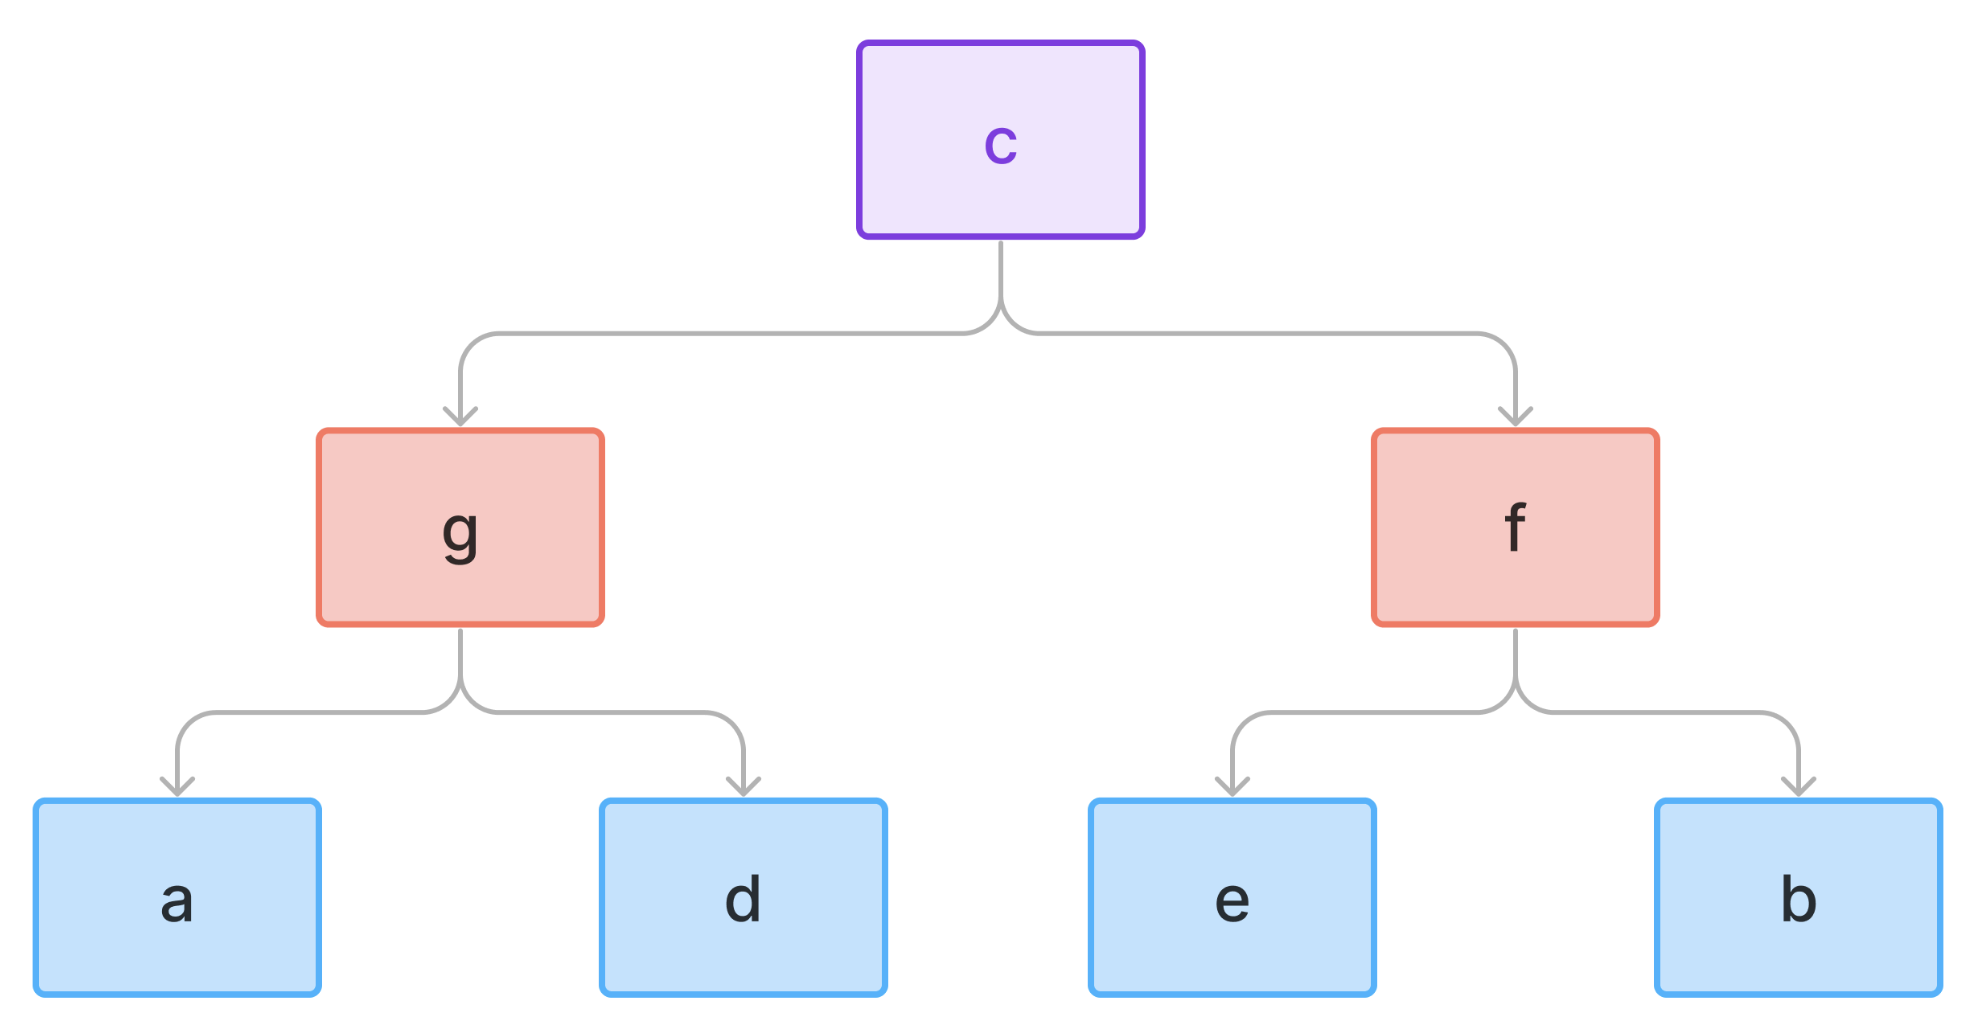

## Time complexity analysis - Local Tree

### Theoretical approach

There are two parts of getting the local tree: 1) computing the LCS matrix and 2) building the genealogy tree


#### Computing the LCS matrix
The longest_common_subsequences function calculates the LCS of two strings of lengths m and n. The computation involves filling up a m+1 by n+1 matrix, which is a process that takes O(m×n) time.

Given that there are $N$ genes, each of length $M$, and that the LCS must be computed for each pair of genes, the number of pairwise LCS computations is:

$$
\binom{N}{2} = \frac{N(N-1)}{2}
$$

Since each computation takes $\binom{M}{2}$ time (assuming gene lengths are fairly uniform), the total time complexity for constructing the full LCS matrix is:

$$
O\left(\frac{N(N-1)}{2} \times M^2\right) = O(N^2 M^2)
$$


#### Building the genealogy tree
First, the code calculates scores for each gene. This requires summing over each row of the LCS matrix and normalizing by the diagonal element. Each row sum operation is O(N) and is done N times, resulting in O(N^2) complexity for this step. Then, it identifyes the root, which costs O(N) as it involves finding the maximum of the computed scores. Lastly, it finds the children recursively, where node finds its children by examining all other unused nodes and selecting two of them based on the highest LCS values. The operations within find_children are bounded by O(N*logN) for sorting LCS values for each node. For each node, children are found once and nodes are marked as used, thus each node processes this O(NlogN) operation only once. Therefore, this step costs O(N^2*logN).

#### Overall Complexity
Combining both parts, the total time complexity of building the local tree is: 

$$O(N^2 M^2) + O(N^2 \log N) \approx O(N^2 M^2)$$


#### Interpretation

The N^2 component indicates that the execution time increases quadratically with the number of genes. Similarly, M^2 component shows that the time complexity also grows quadratically with the length of each gene. Combinding these two components, we can conclude that the algorithm's runtime grows quadratically with both the number of genes and the length of each gene. This implies that For very large values of N and M, even minor increases in these parameters can lead to excessively long computational times.

### Empirical Analysis

I created two graph by fixing either N or M.

When fixing the length of the sequence (M), I got:
num_sequences_values=[5, 10, 20, 40, 80], Times=[0.0021390914916992188, 0.008668899536132812, 0.03072214126586914, 0.12861013412475586, 0.5564260482788086]

Here, we can see that the execution time is increasing by 4 times as the num_sequences_values(N) increases by 2.



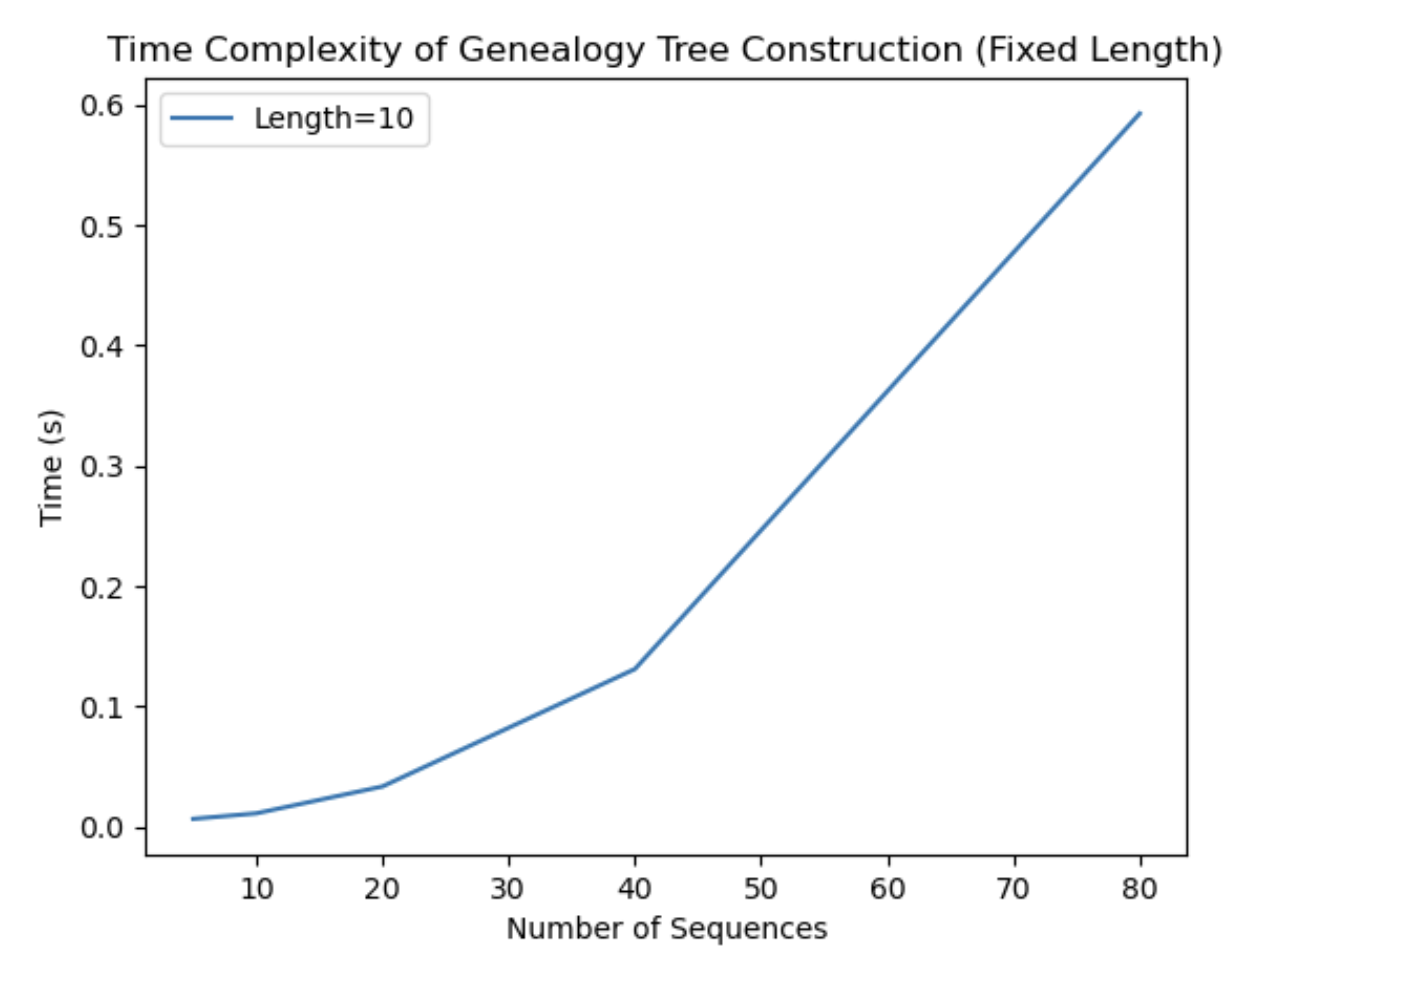


When fixing the number of the sequence (N), I got:
lengths=[5, 10, 20, 40, 80], Times=[0.18118596076965332, 0.6408951282501221, 2.019421100616455, 6.512398958206177, 26.38141894340515]
Here, we can also see that the execution time is increasing by 4 times as the length of sequence(M) increases by 2.

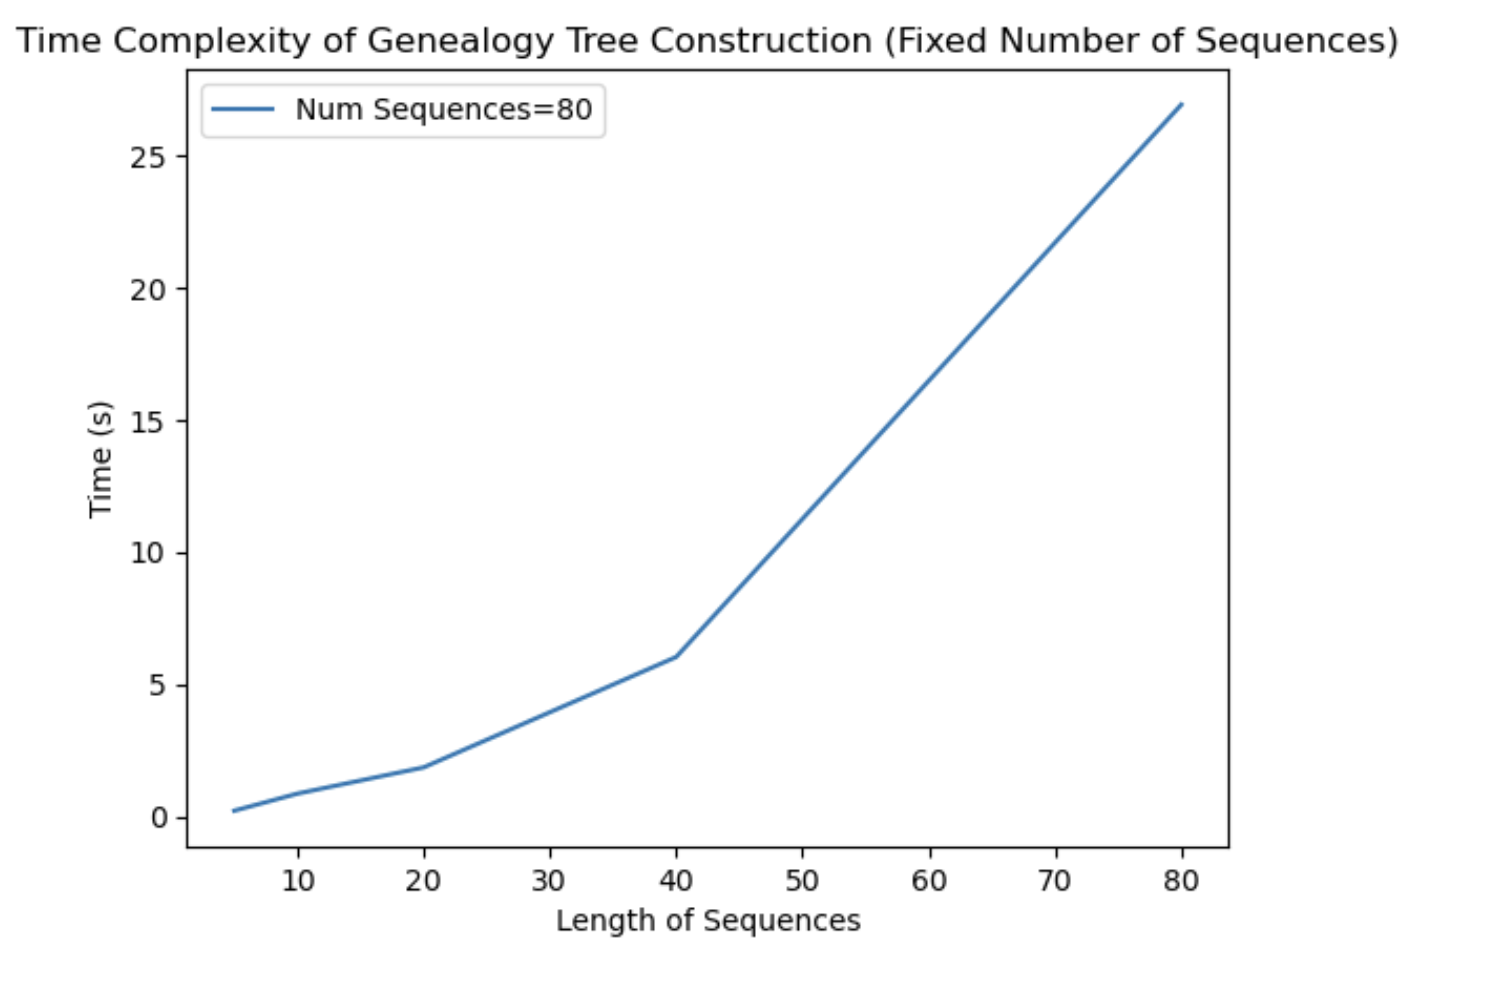

This visualization aligns with the interpretaion of the previous theoretical analysis.

## Global Strategy

### Metric explanation: Levenshtein distance

##### Clarification: The assignment instruction used the term 'mutation', often refers to 'substitution' of gene, in the situation where a character in a sequence is 'randomly changed' into another character. The term 'mutation' is also used to demonstrate a general change (insertions, deletions, and mutations).

### Levenshtien Distance (Edit Distance) vs. LCS in Global Tree
LCS measures the longest sequence of characters that appear left-to-right (but not necessarily consecutively) in both sequences. This metric is particularly useful in local contexts where the goal is to identify the longest segments of genetic material that remain unchanged or minimally altered between two sequences. 

#### Limitations of LCS for Global Genealogy Tree Construction

However, LCS has limitations when used in a global approach that aims to optimize the tree structure based on the overall set of relationships among all sequences. One major limitation of LCS is that it does not account for the number of mutations; it merely measures the lengths of sequences that remain unchanged. While this focus on conserved sequences provides valuable insights into genetic stability and similarity, it does not offer a comprehensive view of the genetic divergences that occur over time. As a result, LCS is less suitable for constructing a global genealogy tree where understanding the full extent of genetic divergence is crucial.

#### Advantages of Using Edit Distance in a Global Context

To address these limitations, I have chosen to use the metric called "Levenshtein distance," also known as "edit distance." This metric calculates the minimum number of single-character edits (insertions, deletions, substitutions) required to transform one string into another. It directly measures the changes needed to modify a genetic sequence, accurately reflecting the mutation processes described in your project prompt.

#### Application of Edit Distance in Constructing a Global Tree:
In a global approach, the edit distance provides a precise numerical value that represents the total mutational distance between any two sequences. This is essential for accurately constructing a genealogy tree that maps the accumulation of mutations from ancestor to descendant. For this project, I constructed a tree that minimizes the total edit distance across all connections. This methodology reflects a tree structure where genetic mutations from ancestors to descendants are minimized, offering a biologically plausible and scientifically desirable representation in genetic studies.

### Dynamic Programming in Levenshtein distance

Levenshtein distance considers the possible operations to convert a character in the first sequence to match the corresponding character in the second sequence. Here, we use dynamic programming to to efficiently compute the exact number of each type of edit operation required to transform one sequence into another, considering all possible operations simultaneously. Calculating the minimum number of operation satisfies two condition for DP.

#### Optimal Substructure
The Levenshtein distance algorithm breaks down the big problem of finding the distance between two sequences into smaller problem. Each step of the computation involves determining the minimal cost to convert a substring of the first sequence into a substring of the second sequence.The solution to the larger problem (the whole sequence) is then constructed from the solutions to these smaller problems. This is evident in the way the algorithm recursively determines the minimum number of insertions, deletions, and mutations needed to align two strings up to certain positions, using previously computed values to build upon.

#### Overlapping Subproblems
The Levenshtien distance revisits the solutions to previous subproblems multiple times. For instance, to compute the transformation cost for the substring ending at position i in one sequence to the substring ending at position j in another sequence, it uses the results of substrings ending at i-1 and j-1. This repeated calculation is optimized by storing the results of these subproblems in a matrix, also known as tabulation, allowing the algorithm to access these results in constant time rather than recomputing them.

#### Step-by-step explanation of Levenshtien distance calculation (See Appendix 4-1 for full code)

1. It starts by creating a matrix where one string is placed on the x-axis and the other on the y-axis. The size of the matrix is (length of string 1 + 1) x (length of string 2 + 1). The first row and the first column are initialized to the indices of the row and column, respectively, representing the number of operations needed to transform an empty string into the corresponding prefix of the string.


2. The algorithm then fills out this matrix one cell at a time. Each cell (i, j) represents the cost of transforming the first i characters of string 1 into the first j characters of string 2.


3. It then fills the rest of the matrix using a dynamic programming approach, where each cell is filled based on the minimum of three possible previous states: one representing an insertion, one a deletion, and one a mutation (if the characters at the current position in the two strings are different)
    - Insertion: Add a character to string 1 to match the last character in string 2.
    - Deletion: Remove the last character from string 1.
    - Mutation: Change the last character of string 1 to match the corresponding character in string 2 if they are different.

    The value of each cell is determined by taking the minimum cost among these three operations. 
    For mutation, an additional check is performed: if the characters are already the same, no cost is added.


4. The bottom-right cell of the matrix contains the Levenshtein distance between the two strings, which is the minimum number of edits required to transform one string into the other.

### Dynamic Programming in building a global tree

#### Optimal Substructure
The optimal solution to the problem (the minimal cost to construct a genealogy tree for a set of sequences) relies on optimal solutions to subproblems (minimal costs to construct trees for subsets of these sequences).

#### Overlapping Subproblems
Many subproblems are solved multiple times, especially when evaluating different potential roots and splits for the same subset of sequences. By using memoization (dp dictionary), the algorithm ensures that each subproblem is solved only once, significantly improving efficiency.

These inherent characteristics of the problem makes DP an ideal approach to build a global tree.

#### Global startegy algorithm overview (See Appendix 4-2 for full code)
1. The algorithm begins by calculating and storing the Levenshtein distances between each pair of sequences. This is essential as the foundation of the tree-building process, which relies on these distances to determine the cost of different tree configurations.


2. A memoization dictionary is used to store the minimum cost of constructing a tree for each subset of sequences. It also keeps track of the decisions made (which sequence was chosen as the root and how the subsets were split) to enable reconstruction of the tree once the optimal costs are determined.


3. The algorithm recursively calculates the minimum cost of constructing a genealogy tree for any given subset of sequences. It tries every sequence as a potential root and computes the cost for every possible division of the remaining sequences into left and right subtrees.


4. For each potential root and division, the function calculates the total cost as the sum of the costs of the left and right subtrees plus the sum of the distances from the root to each sequence in these subtrees.


5. After determining the minimal costs, the algorithm reconstructs the tree by backtracing the information starting from the full set of sequences down to individual sequences.


Based on this algorithm, I got this result: 
- **root:'c'**
- **left child: [{'g': [left child: 'a', right child: 'f']}**
- **right child: {'e': [left child:'b', right child:'d']}]**

#### Figure 2: Global Genealogy Tree 

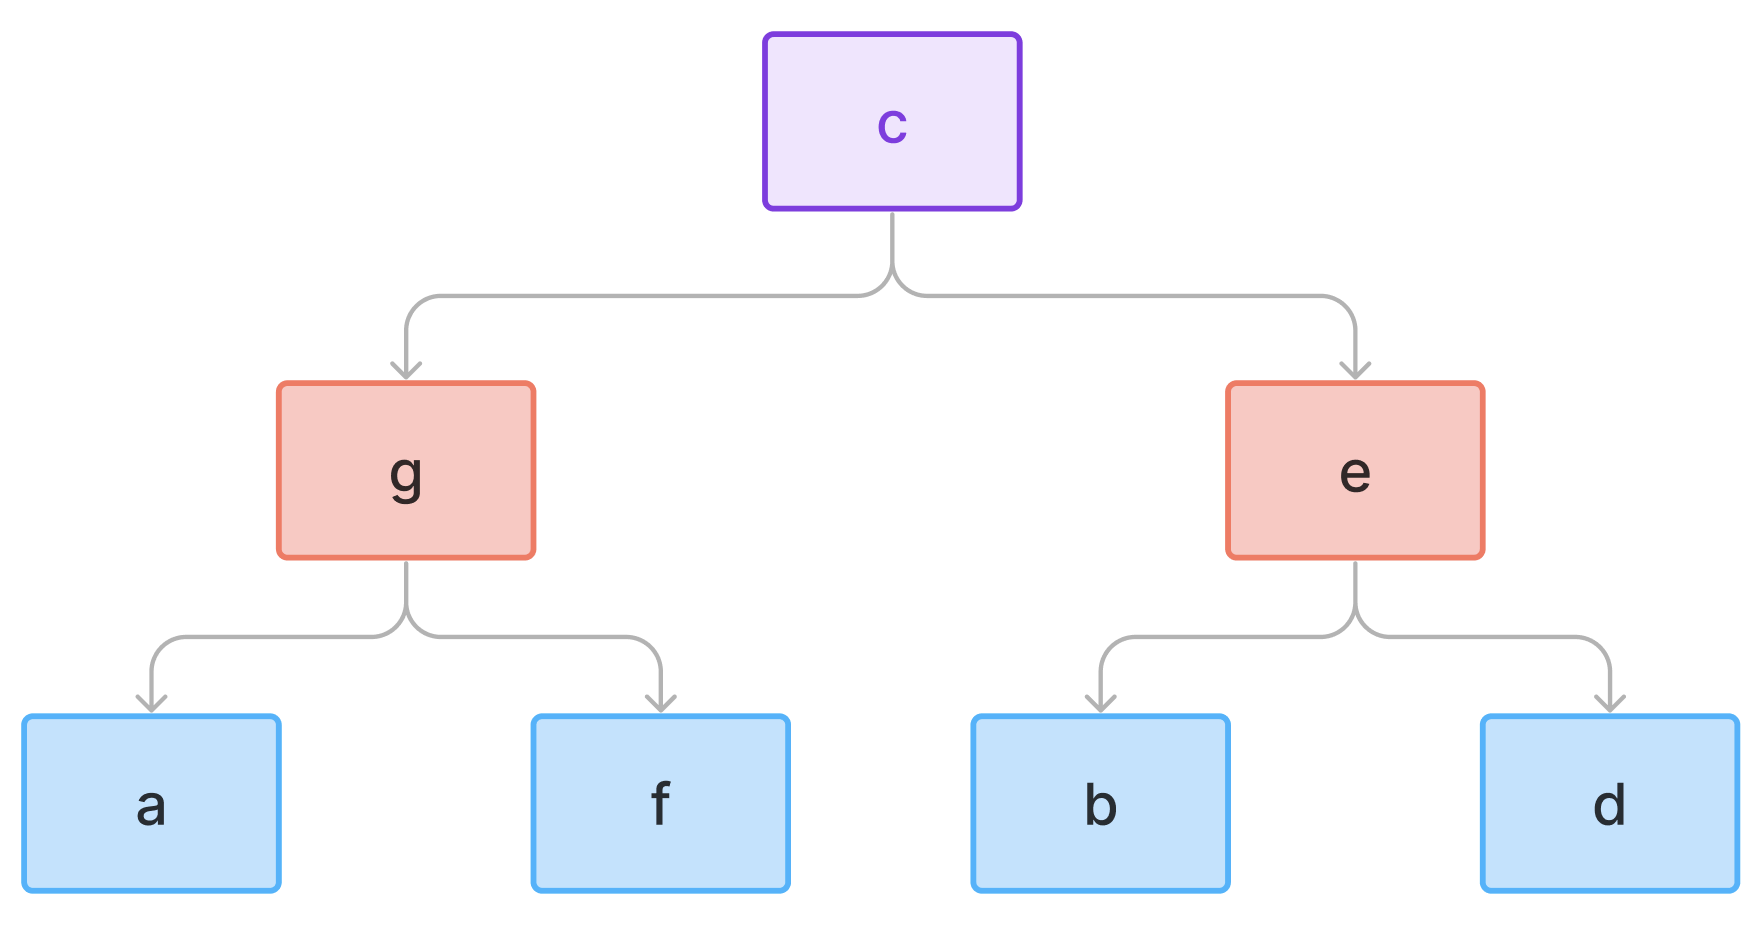

## Time complexity analysis - Global Tree

### Theoretical approach

Building the global tree is also divided into three parts: 1) Levenshtein Distance Calculation, 2) All Pairs Distance Calculation, 3) DP Approach.

#### Levenshtein Distance Computation
Computing the Levenshtein distance between two strings s1 and s2 with lengths m and n respectively involves filling a matrix of size (m+1) x (n+1). The time complexity for each pair of strings is O(mn).

#### All-Pairs Distance Calculation
Since we are assuming the maximum length of any sequence is M, the complexity for comparing any pair becomes O(M^2) in the worst case (where both sequences are of length M). The number of pairs (s1, s2) where s1 and s2 are distinct sequences from a set of N sequences is given by the combination formula C(N, 2) = N(N-1)/2. This means that for N sequences, you perform the pairwise distance calculation N(N-1)/2 times.

The total operations for computing the Levenshtein distance across all pairs are N(N-1)/2 * O(M^2). Simplifying this, it gives a time complexity of O(N^2 * M^2) for the all-pairs distance computation step. This results in:

$$
O\left(\frac{N(N-1)}{2} \times M^2\right) = O(N^2 M^2)
$$

#### Dynamic Programming (DP) Approach
Each sequence can act as a root, and for each root, there are exponentially many ways to split the rest. Therefore, the recursive structure expands significantly with the number of sequences, resulting in factorial growth in the worst case. Each recursive call involves computing the sum of edit distances for the splits. Since the edit distance computation between any two sequences is O(M^2), and considering that each sequence might be involved in multiple such computations across various recursive calls, the multiplier effect leads to a substantial computational load. Therefore, the worst-case time complexity can be approximated as $$O(N! * N * M^2)$$ Here, N! stems from the factorial growth of sequence partitions and the recursive structure, N from choosing each sequence as a root, and M^2 from the pairwise edit distance calculations involved in each recursive step.

#### Interpretation
As the number of sequences (N) increases, the number of possible partitions grows factorially. Therefore, the time complexity grows factorially with the number of sequences.


### Emprical anaylsis

I created a graph with various number of strings and length of strings. Although the visualization outcome does not matches the exponential growth, the theoretical approach is correct.

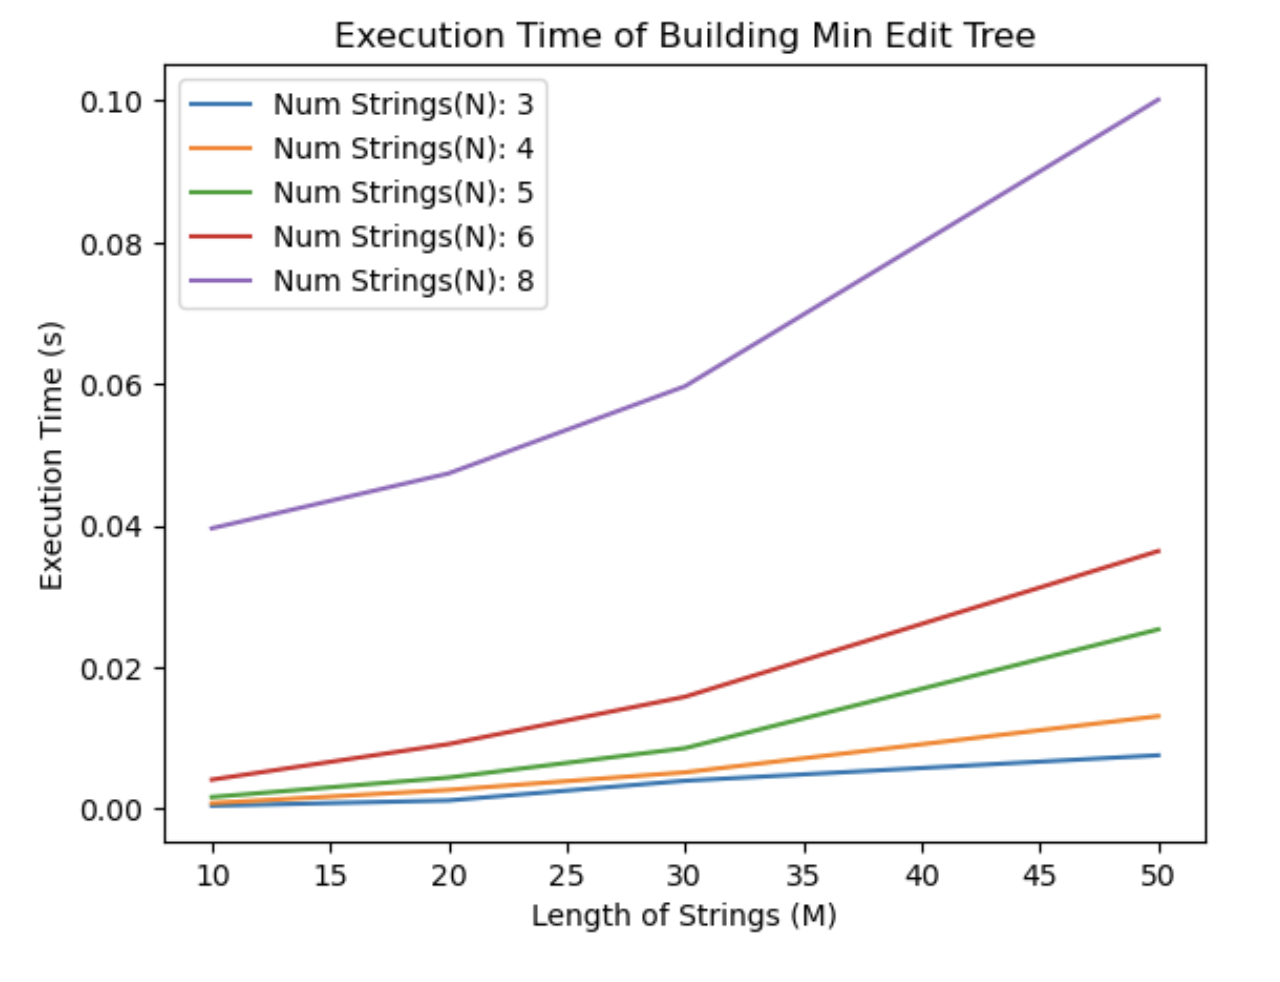

## Local vs. Global Tree analysis

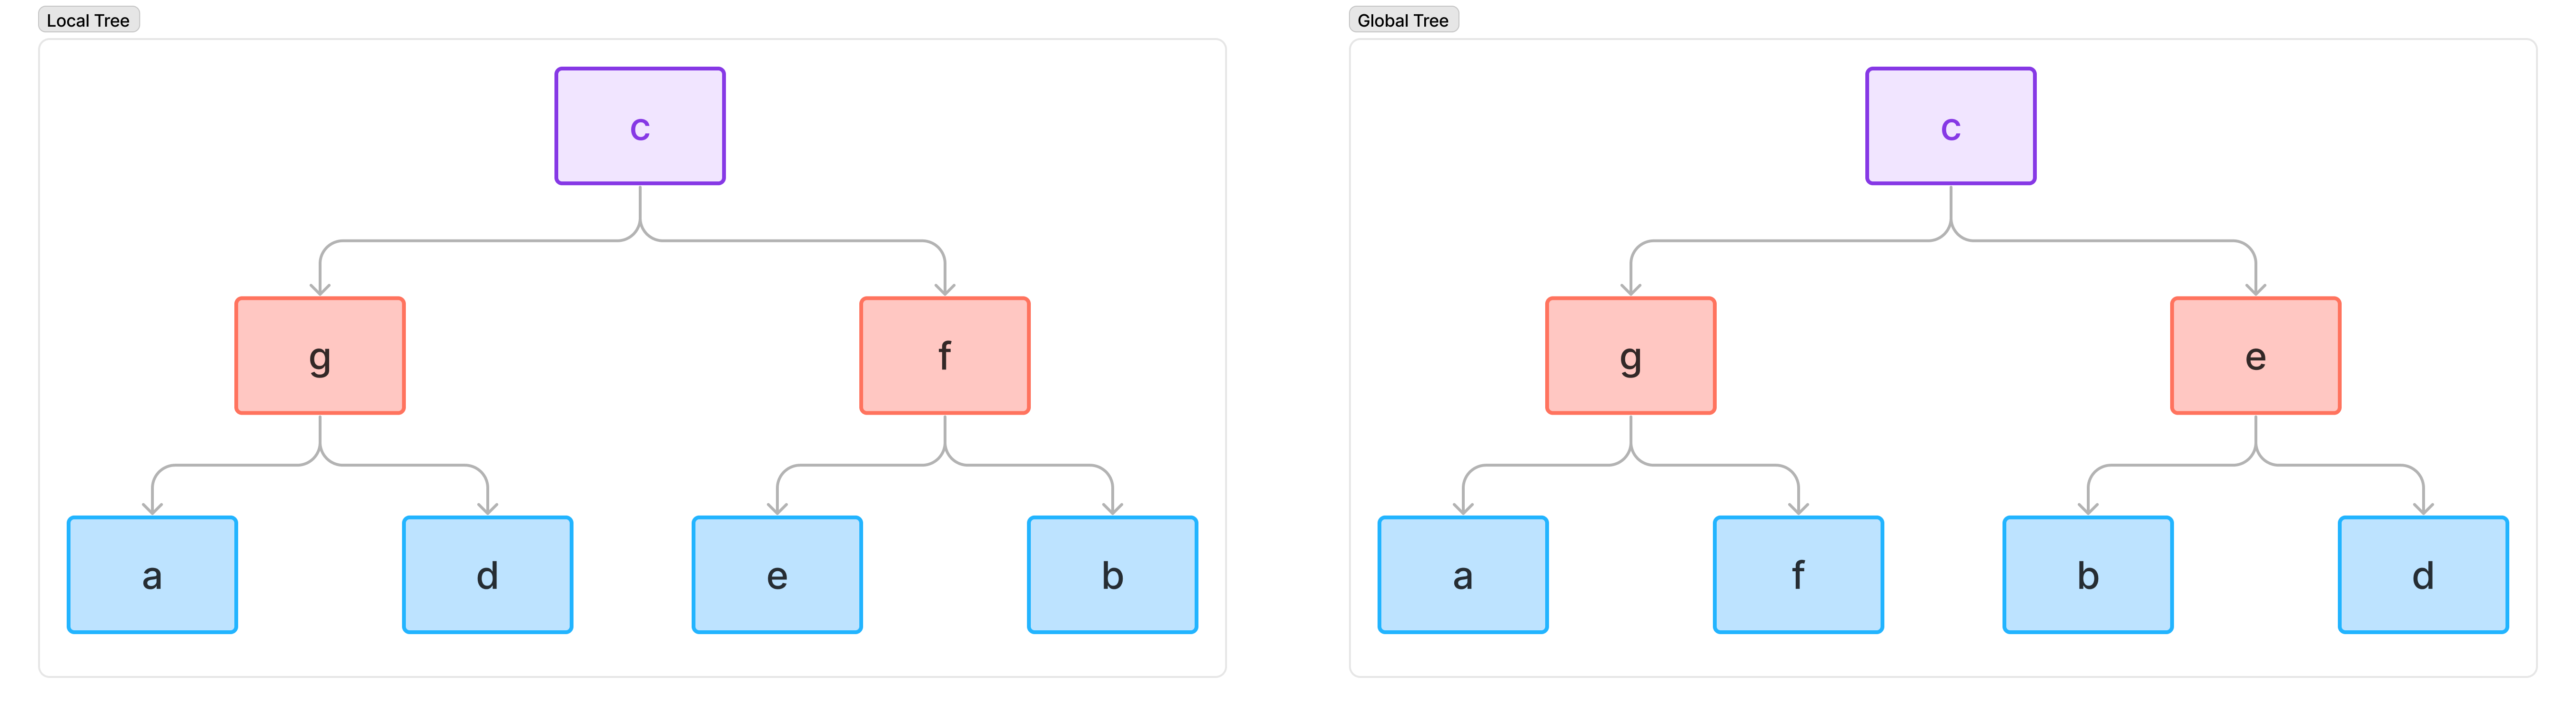

The global strategy and local strategy differ in root selection and the tree-building process. The global strategy algorithm considers all sequences as potential roots and evaluates the cost of constructing the tree for each possible root. In contrast, the local strategy algorithm selects the root based on the sequence with the highest closeness score. While the global strategy recursively calculates the minimum cost of constructing a tree for any given subset of sequences, the local strategy algorithm finds children for each node starting with the root and recursively assigns children based on their similarity scores. Due to these differences, we can expect their trees to look different.

If we actually compare the local and global trees, we can see that their root and left child are the same, but other components are different. The fact that the root and left child are the same suggests that there might be significant global similarity. Still, as expected, the optimization strategy, metric choices, and tree-building process resulted in divergence in the subtrees.

#### Comparing trees with manual comparison
Interestingly, the manual comparison of the relations in the previous section aligns with the left subtree and right subtree of the global tree, as it showed a strong relation between (a, f, g) and (e, b, d). It is notable that 'c' was not in strongly related string pairs, potentially because its relation between children and grandchildren is under the threshold. This assumption is plausible, especially concerning the grandparent-grandchildren relation.

## Probability of insertions, deletions, and mutations

### Rationale for Using Levenshtein Distance in probability calculation

I utilized levenshtein distance to calculate the probability of insertions, deletions, and mutaitons.
This method basically calculates how different two strings are. For each pair of sequences, the algorithm identifies the minimum number of operations needed and categorizes these operations into the three types of mutations (insertions, deletions, and mutaitons). In this specific context, Levenshtein distance directly provides a way to quantify these mutations.


#### Logic for calculating the probabilities of mutations - without an assumption on pair relationship
I computed mutation probabilities per character by iterating over each pair of sequences in the set, employing the Levenshtein distance algorithm to determine edit distances and updating counts. This method measures how each string within the set can transform into every other string. Essentially, I compared every possible pair of strings, calculating the number of changes required to convert one string into another. This process was conducted for all pairs and in both directions, allowing the algorithm to comprehensively assess how strings can mutate into each other. The length of each source string (s1) was accumulated to compute the total number of characters over which these edits could potentially occur. Finally, the probabilities of each type of edit per character were calculated by dividing the total counts of each edit type by the total length of all source strings. This results in a statistical representation of how likely each type of mutation (insertion, deletion, mutation) is to occur per character in the dataset.

An important assumption here is that, since we do not know the original order of the strings, I calculated the probability of 'how each string within the set can transform into every other string,' as mentioned earlier, to avoid assuming any specific relationship between pairs.

Based on this algorithm, I got mutation probabilities per character _(See Appendix 5-1 for full code)_:
- **insertions: 0.086**
- **deletions: 0.086**
- **mutations: 0.234**


#### Logic for calculating the probabilities of mutations - with an assumption on pair relationship (See Appendix 5-2 for full code)
To address the limitation of the previous approach, where pair relationships were disregarded due to normalization, I extended the analysis by computing mutation probabilities using the global genealogy tree. This assumes that the order established in the global tree represents the "original" sequence.

I analyzed mutations between parent and children nodes in the genealogy tree by recursively traversing from the root node. Using the Levenshtein distance algorithm, I compared sequences for each parent-child pair to calculate insertions, deletions, and mutations. The mutation probabilities per character were then calculated by dividing the accumulated edit counts (insertions, deletions, and mutations) by the total length of characters in all parent sequences.


Based on this algorithm with global tree, I got mutation probabilities per character _(See Appendix 5-2 for full code)_:

- **insertions: 0.12**
- **deletions: 0.025**
- **mutations: 0.129**


#### Analysis & critique of estimation approaches

In the first method, I effectively captured the general mutational landscape among all pairs of sequences without assuming any inherent order or lineage, making it a strong and unbiased approach. However, this method can introduce a higher background noise as it does not distinguish between evolutionarily relevant and irrelevant mutations.

The second method introduces a more plausible estimation by considering the genealogy of sequences. This provides a more biologically relevant analysis, assuming the tree correctly reflects evolutionary relationships. However, since the calculation heavily relies on the assumption that the global tree represents the original order, the accuracy is dependent on the accuracy of the tree.


# LOs

### #Algostratdatastruct

I explained why and how I used DP to get the LCS. Also, I identified the advantages and limitations for each metric I chose for local and global strategies and further explained why I chose these metrics despite the limitations in this specific context of genealogy. Also, I explained how the algorithm works at a higher level for each tree construction, examining its conditions (e.g., DP) and benefits/limitations. This is also applied in estimating mutation probabilities, explaining and critiquing my algorithm.

### #CompuationalCritique 
I divided the local and global strategies and explained why the metrics I chose for each approach (Levenshtein vs LCS) are more suitable, considering the specific scenario and goals for both approaches. I acknowledge that the visualization of the global tree is not substantiating the theoretical approach. The local visualization considered both cases (N and M) and supports the interpretation, along with the point calculation. 

### #ComplexityAnalysis 
I thoroughly analyzed theoretical time complexity for local and global approaches, going through all the sections that should be calculated. I also correctly interpreted what the time complexity implies in each specific context. In addition to accurately calculating the time complexity for non-extreme or "normal" cases, I will ensure to take into account all variables that could potentially affect the time complexity, substantiating it with visualization (fixing N and M).

### #CodeReadability

I ensured that the names of variables and functions are clear, and added an appropriate amount of in-line comments considering the audience has a technical background. Additionally, I tried to make the code as concise as possible, avoiding redundant copy-pasting or extensive revisions. For example, in my initial attempt to create an LCS matrix, I modified the 'longest_common_subsequences' function to the 'lcs_length(x, y)' function, only printing the LCS length, by removing the 'find_LCS' section. Then, I applied feedback I received to avoid copying and pasting the code and modifying it, as it is hard to track the changes. Therefore, I revised it to reuse the 'longest_common_subsequences' function, making it more concise and easy to read.

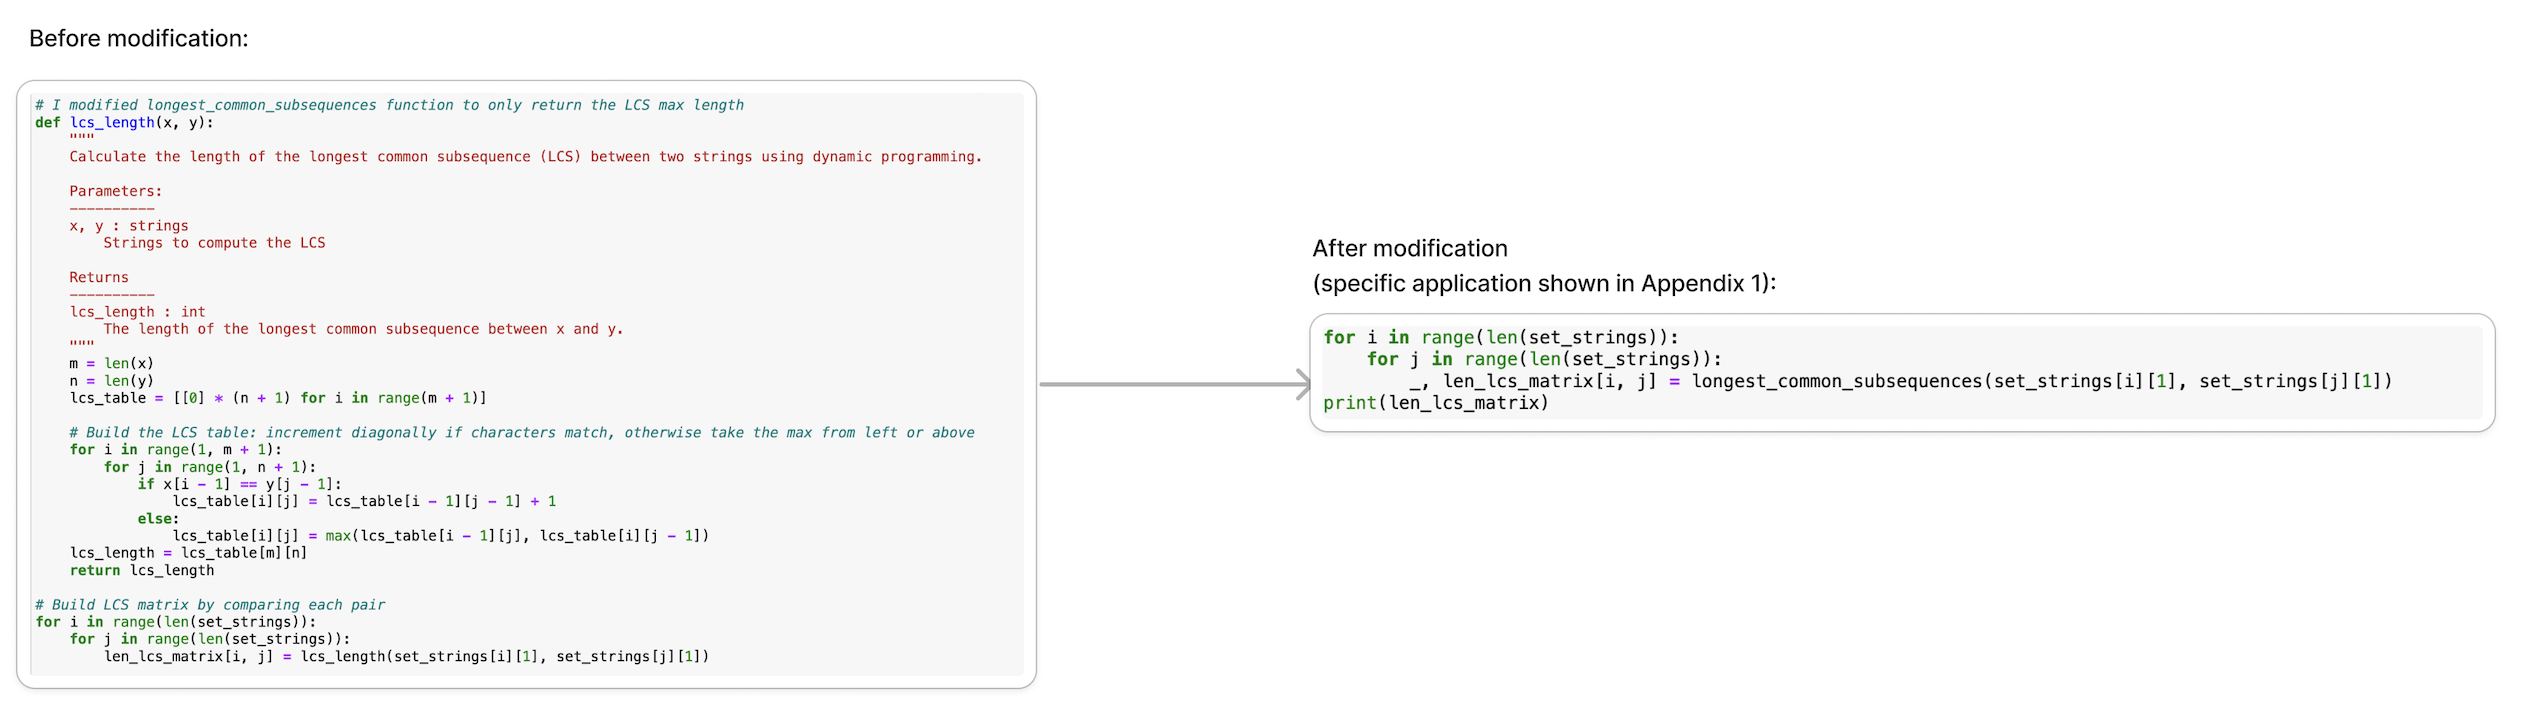

### #PythonProgramming
I tested both normal and edge cases for LCS code, going beyond the test cases given in the assignment, while explaining how each test cases addresses each aspect of the code. All of my codes runs without an error.

### #Professionalism
The feedback I received for this HC was: 1) Not including captions for figures/screenshots and tables, 2) not specifying enough details in discussions with collaborators/AI statements, 3) including entire code cells in the main text. I reflected and applied all of this feedback in this assignment. Furthermore, I followed all the prompts given in the assignment and present it in a professional manner, along with going beyond the questions and challenging myself to explore the topics in depth.

# HCs

### #Audience
Throughout the assignment, I considered the audience for code comments and whole organization. For instance, I originally had this line for _test_longest_common_subsequences_'s docstring: "Each test asserts whether the actual output from longest_common_subsequences matches the expected output." However, considering that the audience of this assignment can read the code of this function, I deleted this part.

### #Organization

Although I addressed all the questions asked in the assignment, I changed the order of it in order to enhance the readability and flow of the logic. For example, I placed the time complexity analysis right after the local and global approach, rather than placing it afterward. Additionally, I put a lot of effort into concise and clear visualization, and added appropriate headings for each section, contributing to the overall organization of this document.

### #Agorithm

I carefully justified choices I made for the algorithm, throughout the whole assignment. Also, I provided both high-level and step-by-step explanation of algorithm, which aligns with my python code.

## AI Statement

- I used ChatGPT to check the grammar throughout the assignment, using the prompt: 'check and revise grammar: [prompt].' 
- I also used ChatGPT to change the text format of set_strings provided in the assignment into a valid dictionary for Python (set_strings).
- I used ChatGPT to give me a guideline to debug the code, but only when I spent sufficient time debugging it by myself (1+ hour).

## References

- CS110 - Pseudo Project 3 - Choose your Final Computational Application
- CS110 Session 24 - [14.1] Computational applications of dynamic programming and greedy algorithms

## Appendix

### Appendix 1: LCS calculation

In [222]:
import numpy as np

# Initialize set_strings dictionary
set_strings = [
    ('a', 'GGCGCCATGTTACAGGTCTTTATTTTGTTTCCAGCCAGAATTCAGACCGGGCAGTGTTCTAATCTTCCTTTACAGCAACGAAGTTACATACTAAAGCTGCGTTGGCTCTTGTACGCTAGCAGCAGGCGAGTTTTTACCTGTTGTGGCAAGA'),
    ('b', 'GGCACCTCGGAAGCTTTCCTATGGTTAACCAGGGAGTAATAAAAGGAATTCAACAAATTCCTATCATTCCCTACCATACCAGCCCTCCTAGAGTCATTTGTGTATTCGTGTTTATGTACGTGGGTTAAGCAGATAAGGAACCCAA'),
    ('c', 'GACCTCGTCAGCTTCAGTTTATCCAGCAGAATTCAGATGTCATAGTTCGTATCATTCCTGCAAAGAGTACTAGAAGCGTCATAGTCTTTTCTAATAGTACGAGGTTTACCTGTTTGGCAA'),
    ('d', 'GCACCTCGAGAGATCATTTGCCATGTAACTAAGCTGAATTTAAAGGATGTCCGACAGTTCCTTATCCTCTGCTCGATTACGATGCCCCTATATACGCATACTATGCCTGTCTAGTAGTACGTGGTGCTTAAACATAAGGGACCCAA'),
    ('e', 'GCACCTCGGAAGCTTTCCATGTTATACAAGCAGAATTAAAGATGTTCACAGTTCCTTTCATCCCTGCCAATACCAGCCCCTTAGAGCCCATATGTTCTATTCTATTATGTACGTGGGTTAACAGTATAGGACCAA'),
    ('f', 'CCGCACCGTTCAAGGCTTTCCATGGTGTTCGAGCCAGAATTCCAGATCGTCCAGGAGTTCATTATTCCTTTACTCCATTGAAGGTGACATAACTAACTGCCGTACAGTTGCTATGGATCTCAACCACTGAGGGGAGGAGGGTTTTACTGACTTGGTCAAA'),
    ('g', 'GCGCTCGTTCAGCTTTCATTTTCTTCCAGCCAGAATTCAGATCGTTCAGAGTTCTTAACTTCTTTACTGCAAAGAAGTTACTACAAAGCCGTCGTTGCTCTTGTCTCAACCAGCTAGGGAGGGTTTACCTGTTTGGCAAA')
]

# Create LCS matrix
lcs_matrix = np.zeros((7, 7), dtype=int)

# Build LCS matrix by comparing each pair
for i in range(len(set_strings)):
    for j in range(len(set_strings)):
        _, lcs_matrix[i, j] = longest_common_subsequences(set_strings[i][1], set_strings[j][1])
print(lcs_matrix)

[[151  94 100  96  95 113 122]
 [ 94 145  91 111 117  99  89]
 [100  91 120  93  98 101 107]
 [ 96 111  93 146 115 105  96]
 [ 95 117  98 115 135 102  95]
 [113  99 101 105 102 160 121]
 [122  89 107  96  95 121 140]]


### Appendix 2: Average and standard deviation of LCS

In [183]:
# Ignore diagonal values and calculate mean and std. dev

lcs_without_diagonal = np.copy(lcs_matrix).astype(float)
np.fill_diagonal(lcs_without_diagonal, np.nan)

average_lcs = np.nanmean(lcs_without_diagonal)
std_dev_lcs = np.nanstd(lcs_without_diagonal)

# Calculate threshold
threshold = average_lcs + std_dev_lcs

average_lcs, std_dev_lcs, threshold


(102.85714285714286, 9.784758382230981, 112.64190123937384)

### Appendix 3-1: Building a Local Tree

In [223]:
def build_genealogy_tree(lcs_matrix, labels):
    """
    Constructs a genealogy tree from a given LCS matrix and a list of labels. The tree is built
    by first identifying the root based on the highest closeness score calculated from the LCS matrix,
    then recursively finding children based on the highest LCS values with unused nodes. Only nodes
    with children are included in the final tree.

    Inputs
    ----------
    lcs_matrix : list of lists
        A square matrix where each element [i][j] represents the LCS score between the ith and jth labels.
    labels : list of strings
        A list of string labels representing each sequence or node in the LCS matrix.

    Returns
    ----------
    tree : dict
        A dictionary representing the genealogy tree where each key is a node and the value is a list of its child nodes.
        Only nodes that have children are included in this dictionary.
    """
    n = len(labels)
    # Calculate normalized scores for each label based on the LCS matrix
    scores = [sum(lcs_matrix[i]) / lcs_matrix[i][i] for i in range(n)]
    # Find the index of the label with the highest score to determine the root and assign root
    root_index = scores.index(max(scores))
    root = labels[root_index]

    tree = {}
    # Create dictionary to keep track of used labels
    used = {label: False for label in labels}

    def find_children(current_index):
        """
        Identifies and returns up to 'count' children for a given node, based on the highest LCS values from the LCS matrix,
        excluding already used nodes to avoid cycles in the tree.

        Inputs
        ----------
        current_index : int
            The index of the current node in the labels list from which children are to be found.
        count : int, optional
            The maximum number of children to find for the current node (default is 2).

        Returns
        ----------
        children : list of strings
            A list of labels that are the children of the current node.
        """
        lcs_pairs = []

        # Generate list of (LCS value, label) pairs excluding used labels and the current label
        for j in range(n):
            if j != current_index and not used[labels[j]]:
                lcs_pairs.append((lcs_matrix[current_index][j], labels[j]))

        # Sort the lcs_pairs list in descending order by the LCS value
        lcs_pairs.sort(reverse=True, key=lambda x: x[0])

        # Build a binary tree
        children = []
        for _, label in lcs_pairs[:2]:
            children.append(label)

        # Mark the selected labels as used
        for child in children:
            used[child] = True

        return children

    # Mark the root label as used
    used[root] = True
    
    # Add children for the root node
    children = find_children(root_index)
    if children:
        tree[root] = children

    # Recursively find grandchildren for each child
    for child in tree.get(root, []):
        child_index = labels.index(child)
        grandchildren = find_children(child_index)
        if grandchildren:
            tree[child] = grandchildren

    return tree


labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

tree = build_genealogy_tree(lcs_matrix, labels)
print(tree)

{'c': ['g', 'f'], 'g': ['a', 'd'], 'f': ['e', 'b']}


### Appendix 3-2: Time complexity visualization

num_sequences_values=[5, 10, 20, 40, 80], Times=[0.006537914276123047, 0.011129140853881836, 0.03347301483154297, 0.13107776641845703, 0.5927391052246094]


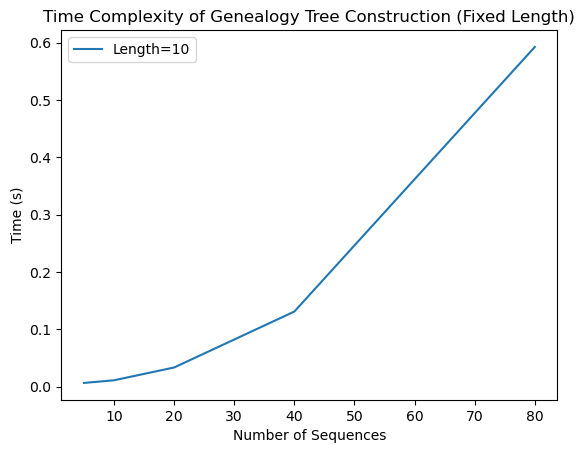

lengths=[5, 10, 20, 40, 80], Times=[0.20693397521972656, 0.8529109954833984, 1.845881700515747, 6.023420810699463, 26.922317028045654]


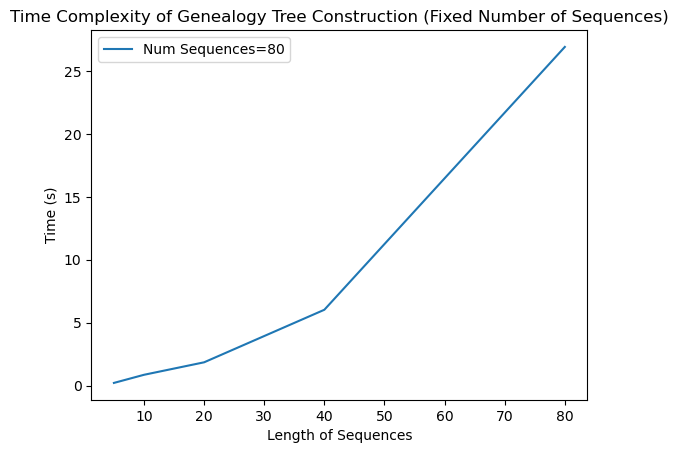

In [235]:
import random
import time
import matplotlib.pyplot as plt

# Function to generate random sequences
def generate_sequences(length, num_sequences):
    sequences = []
    for _ in range(num_sequences):
        sequence = ''.join(random.choices('abcdefghijklmnopqrstuvwxyz', k=length))
        sequences.append(sequence)
    return sequences

# Generate random sequences
fixed_lengths = [10]
lengths = [5, 10, 20, 40, 80]

fixed_nums = [10]
num_sequences_values = [5, 10, 20, 40, 80]

# Plotting for fixed length
for length in fixed_lengths:
    times = []
    for num_sequences in num_sequences_values:
        sequences = generate_sequences(length, num_sequences)
        
        start_time = time.time()
        lcs_matrix = [[longest_common_subsequences(seq1, seq2)[1] for seq2 in sequences] for seq1 in sequences]
        build_genealogy_tree(lcs_matrix, sequences)
        end_time = time.time()
        
        times.append(end_time - start_time)
    
    plt.plot(num_sequences_values, times, label=f'Length={length}')
    # Print specific values for analysis
    print(f"num_sequences_values={num_sequences_values}, Times={times}")

plt.xlabel('Number of Sequences')
plt.ylabel('Time (s)')
plt.title('Time Complexity of Genealogy Tree Construction (Fixed Length)')
plt.legend()
plt.show()

# Plotting for fixed number of sequences
for fixed_num in fixed_nums:
    times = []
    for length in lengths:
        sequences = generate_sequences(length, num_sequences)
        
        start_time = time.time()
        lcs_matrix = [[longest_common_subsequences(seq1, seq2)[1] for seq2 in sequences] for seq1 in sequences]
        build_genealogy_tree(lcs_matrix, sequences)
        end_time = time.time()
        
        times.append(end_time - start_time)
    
    plt.plot(lengths, times, label=f'Num Sequences={num_sequences}')
    # Print specific values for analysis
    print(f"lengths={lengths}, Times={times}")

plt.xlabel('Length of Sequences')
plt.ylabel('Time (s)')
plt.title('Time Complexity of Genealogy Tree Construction (Fixed Number of Sequences)')
plt.legend()
plt.show()


### Appendix 4-1: levenshtein_distance calculation

In [119]:
def levenshtein_distance_and_edits(s1, s2):
    """
    Computes the Levenshtein distance between two strings along with the number of insertions, deletions, and mutations required to transform one string into the other.

    Inputs
    ----------
    s1, s2: str
        Input strings for which Levenshtein distance and edit operations are to be computed.

    Returns
    ----------
    distance: int
        The Levenshtein distance between the input strings.
    insertions: int
        The number of insertions required to transform s1 into s2.
    deletions: int
        The number of deletions required to transform s1 into s2.
    mutations: int
        The number of mutations required to transform s1 into s2.
    """
    # Create an empty matrix with dimensions (m+1) x (n+1)
    m, n = len(s1), len(s2)
    matrix = [[0] * (n + 1) for _ in range(m + 1)]
    # Initialize the first row and column with indices
    for i in range(1, m + 1):
        matrix[i][0] = i
    for j in range(1, n + 1):
        matrix[0][j] = j
    
    # Fill the matrix with minimum edit distances using dynamic programming
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                cost = 0
            else:
                cost = 1
            matrix[i][j] = min(matrix[i - 1][j] + 1,      # Insertion
                               matrix[i][j - 1] + 1,      # Deletion
                               matrix[i - 1][j - 1] + cost)  # Mutation

    # Backtrack to find the number of each operation
    i, j = m, n
    insertions, deletions, mutations = 0, 0, 0
    while i > 0 and j > 0:
        if s1[i - 1] == s2[j - 1]:
            cost = 0
        else:
            cost = 1
        
        if matrix[i][j] == matrix[i - 1][j - 1] + cost:
            if cost == 1:
                mutations += 1
            i, j = i - 1, j - 1
        elif matrix[i][j] == matrix[i][j - 1] + 1:
            insertions += 1
            j -= 1
        else:
            deletions += 1
            i -= 1

    # Account for the remaining insertions and deletions
    insertions += j
    deletions += i
    return matrix[m][n], insertions, deletions, mutations    # Create an empty matrix with dimensions (m+1) x (n+1)
    m, n = len(s1), len(s2)
    matrix = [[0] * (n + 1) for _ in range(m + 1)]
    # Initialize the first row and column with indices
    for i in range(1, m + 1):
        matrix[i][0] = i
    for j in range(1, n + 1):
        matrix[0][j] = j
    
    # Fill the matrix with minimum edit distances using dynamic programming
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                cost = 0
            else:
                cost = 1
            matrix[i][j] = min(matrix[i - 1][j] + 1,      # Insertion
                               matrix[i][j - 1] + 1,      # Deletion
                               matrix[i - 1][j - 1] + cost)  # Mutation

    # Backtrack to find the number of each operation
    i, j = m, n
    insertions, deletions, mutations = 0, 0, 0
    while i > 0 and j > 0:
        if s1[i - 1] == s2[j - 1]:
            cost = 0
        else:
            cost = 1
        
        if matrix[i][j] == matrix[i - 1][j - 1] + cost:
            if cost == 1:
                mutations += 1
            i, j = i - 1, j - 1
        elif matrix[i][j] == matrix[i][j - 1] + 1:
            insertions += 1
            j -= 1
        else:
            deletions += 1
            i -= 1

    # Account for the remaining insertions and deletions
    insertions += j
    deletions += i
    
    distance = matrix[m][n]
    return distance, insertions, deletions, mutations

### Appendix 4-2: Building a global tree

In [177]:
from itertools import combinations

def min_edit_tree(sequences):
    """
    Constructs an optimal genealogical tree of sequences based on the minimum edit distance.

    This function calculates the optimal way to hierarchically cluster a set of sequences such that the total 
    Levenshtein distance (or edit distance) among these sequences is minimized. The solution involves using 
    dynamic programming (DP) to minimize the sum of distances between a chosen root sequence and its child 
    clusters recursively.

    Parameters:
    ----------
    sequences : dict
        A dictionary where keys are identifiers and values are sequences (strings or lists).

    Returns:
    ----------
    tuple
        A tuple containing two elements:
            - The first element is the total minimum edit distance cost to construct the tree.
            - The second element is the nested dictionary representing the hierarchical clustering of the sequences.
    """
    # Dictionary to store the Levenshtein distances
    dist = {}
    for id_a, seq_a in sequences.items():
        for id_b, seq_b in sequences.items():
            if id_a != id_b:  # Skip comparing a sequence to itself
                dist[(id_a, id_b)], _, _, _ = levenshtein_distance_and_edits(seq_a, seq_b)
                dist[(id_b, id_a)] = dist[(id_a, id_b)]  # Symmetric

    # Memoization dictionary for the DP subproblem solutions
    dp = {}
    backtrace = {}

    # Define the DP function to find the minimal edit distance sum for a subset of sequences
    def dp_min_cost(subset):
        """
        A helper function to compute the minimum cost for a given subset of sequence IDs using DP.

        This function recursively calculates the minimum sum of edit distances required to build a binary 
        tree from a subset of sequences, with one sequence as the root and the remaining sequences split into 
        two groups.

        Parameters:
        ----------
        subset : tuple
            A tuple of sequence IDs representing the subset for which to calculate the minimum cost.

        Returns:
        ----------
        int
            The minimum cost to construct the tree for the given subset.
        """
        if len(subset) == 1:
            return 0  # Base case: single node tree has zero cost
        if subset in dp:
            return dp[subset]

        min_cost = float('inf')
        best_split = None

        # Try every sequence as the root
        for root in subset:
            remaining = list(subset)
            remaining.remove(root)
            # Try every possible way to split the remaining elements into two groups
            for L in range(1, len(remaining) + 1):
                for left_group in combinations(remaining, L):
                    right_group = tuple(x for x in remaining if x not in left_group)
                    # Calculate the cost of this split
                    left_cost = sum(dist[(root, x)] for x in left_group) + dp_min_cost(tuple(left_group))
                    right_cost = sum(dist[(root, x)] for x in right_group) + dp_min_cost(tuple(right_group))
                    cost = left_cost + right_cost
                    # Update minimum cost and store the partition
                    if cost < min_cost:
                        min_cost = cost
                        best_split = (root, tuple(left_group), tuple(right_group))

        dp[subset] = min_cost
        backtrace[subset] = best_split
        return min_cost

    # Start the DP with the full set of indices
    full_set = tuple(sequences.keys())
    total_min_cost = dp_min_cost(full_set)

    # Function to reconstruct the tree from the backtrace information
    def reconstruct_tree(subset):
        """
        A helper function to reconstruct the tree from the backtrace information.

        This function recursively constructs the nested dictionary representing the hierarchical tree of 
        sequences based on the backtrace paths determined by `dp_min_cost`.

        Parameters:
        ----------
        subset : tuple
            A tuple of sequence IDs for which to reconstruct the tree.

        Returns:
        ----------
        dict
            A dictionary representing the tree structure, where each key is a sequence ID and its value
            is a list of child nodes.
        """
        if len(subset) == 1:
            return subset[0]  # Return only the sequence ID

        root, left_group, right_group = backtrace[subset]
        tree = {root: []}

        # Add left child if not empty
        if left_group:
            tree[root].append(reconstruct_tree(left_group))

        # Add right child if not empty
        if right_group:
            tree[root].append(reconstruct_tree(right_group))

        return tree

    # Build the final tree
    final_tree = reconstruct_tree(full_set)
    return total_min_cost, final_tree


total_min_cost, final_tree = min_edit_tree(set_strings)
print("Total Minimum Edit Cost:", total_min_cost)
print("Genealogy Tree:", final_tree)


Total Minimum Edit Cost: 463
Genealogy Tree: {'c': [{'g': ['a', 'f']}, {'e': ['b', 'd']}]}


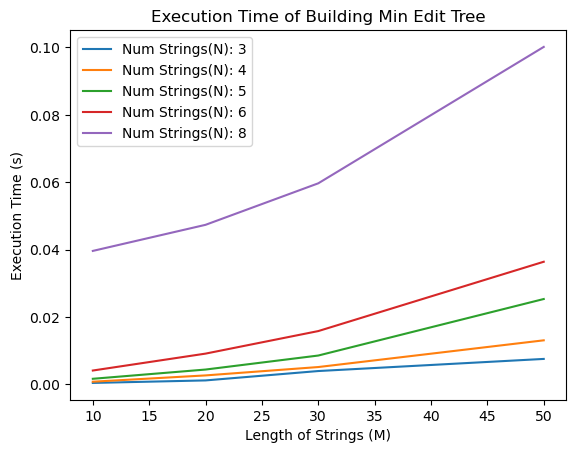

In [212]:
import random
import string
import matplotlib.pyplot as plt
import timeit
from itertools import combinations


def generate_random_strings(num_strings, length):
    return {f"seq{i}": ''.join(random.choices(string.ascii_lowercase, k=length)) for i in range(num_strings)}

def measure_time(num_strings, length):
    sequences = generate_random_strings(num_strings, length)
    start_time = timeit.default_timer()
    min_edit_tree(sequences)
    return timeit.default_timer() - start_time


num_strings_list = [3, 4, 5, 6, 8]
lengths = [10, 20, 30, 50]
results = {num: [measure_time(num, length) for length in lengths] for num in num_strings_list}

for num, times in results.items():
    plt.plot(lengths, times, label=f'Num Strings(N): {num}')
plt.xlabel('Length of Strings (M)')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Building Min Edit Tree')
plt.legend()
plt.show()

### Appendix 5-1: Probabilities without assumption on pair relationships

In [106]:
# Initialize dictionary to store edit counts and total length.
edit_counts = {'insertions': 0, 'deletions': 0, 'mutations': 0}
total_length = 0
# Iterate over each sequence pair to calculate edit distances and update counts.
for seq1 in set_strings:
    for seq2 in set_strings:
        if seq1 != seq2:
            s1, s2 = set_strings[seq1], set_strings[seq2]
            _, ins, dels, muts = levenshtein_distance_and_edits(s1, s2)
            edit_counts['insertions'] += ins
            edit_counts['deletions'] += dels
            edit_counts['mutations'] += muts
            # Add the length of both strings when each acts as the source.
            total_length += len(s1)

# Calculate probabilities by dividing mutation counts with total length of characters
probabilities = {k: v / total_length for k, v in edit_counts.items() if total_length > 0}
print("Mutation probabilities per character:", probabilities)

Mutation probabilities per character: {'insertions': 0.08633934535738143, 'deletions': 0.08633934535738143, 'mutations': 0.23413493653974615}


### Appendix 5-2: Probabilities with assumption on pair relationships (Based on global tree)

In [157]:
# Initialize global genealogy tree
genealogy_tree = {
    'c': ['e', 'g'],
    'e': ['b', 'd'],
    'g': ['a', 'f'],
    'b': [],
    'd': [],
    'a': [],
    'f': []
}

def calculate_mutation_probabilities(tree, set_strings):
    """
    Calculate mutation probabilities based on a genealogy tree and set of sequences.

    Parameters
    ----------
    tree : dict
        A dictionary representing the genealogy tree where keys are nodes and values are lists of child nodes.
    set_strings : list
        A list of tuples containing sequences and their corresponding labels.

    Returns
    -------
    dict
        A dictionary containing mutation probabilities per character, including 'insertions', 'deletions', and 'mutations'.
    """

    # Convert set_strings to a dictionary for easier access
    sequences = {label: seq for label, seq in set_strings}

    # Initialize dictionary to store edit counts and total length.
    edit_counts = {'insertions': 0, 'deletions': 0, 'mutations': 0}
    total_length = 0

    # Start processing from the root of the tree
    root = 'c'
    if root in tree:
        for node in tree[root]:
            if node in tree:
                children = tree[node]
                for child in children:
                    # Check if the child is not an empty reference and update edit counts of the pair
                    if child:  
                        distance, ins, dels, muts = levenshtein_distance_and_edits(sequences[node], sequences[child])
                        edit_counts['insertions'] += ins
                        edit_counts['deletions'] += dels
                        edit_counts['mutations'] += muts
                        total_length += len(sequences[node])  # Add length of parent sequence only
    # Calculate probabilities by dividing mutation counts by the total length of characters
    if total_length > 0:
        probabilities = {k: v / total_length for k, v in edit_counts.items()}
    else:
        probabilities = {k: 0 for k in edit_counts}

    return probabilities

probabilities = calculate_mutation_probabilities(genealogy_tree, set_strings)
print("Mutation probabilities per character:", probabilities)


Mutation probabilities per character: {'insertions': 0.12, 'deletions': 0.025454545454545455, 'mutations': 0.1290909090909091}
